In [4]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


In [6]:
train_data = unpickle('data/train')
test_data = unpickle('data/test')
labels = unpickle('data/meta')
interesting_coarse_labels = [0, 1]  # Aquatic mammals and Fish


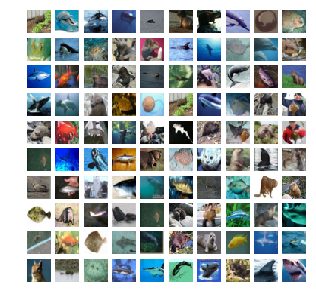

In [7]:
train = []
y = []
test = []
y_test = []
for i in range(len(train_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if train_data[b'coarse_labels'][i] == j:
            train.append(train_data[b'data'][i])
            y.append(j)
            break

for i in range(len(test_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if test_data[b'coarse_labels'][i] == j:
            test.append(test_data[b'data'][i])
            y_test.append(j)
            break

train = np.array(train)
y = np.array(y)
test = np.array(test)
y_test = np.array(y_test)
train_reshaped = train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_reshaped = test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Visualizing CIFAR 100
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(train_reshaped)))
        axes[j][k].set_axis_off()
        axes[j][k].imshow(train_reshaped[i:i + 1][0])


In [8]:
import numpy as np


class NearestNeighbour:
    def __init__(self, k=1):
        self.k = k
        self.X = None
        self.y = None

    def train(self, x, y):
        self.X = x
        self.y = y

    def predict(self, x_test):
        sorted_indexes = np.argsort(np.sum(np.abs(self.X - x_test), axis=(1, 2, 3)))[:self.k]
        return np.max(self.y[sorted_indexes])

    def accuracy(self, test, y_test):
        success = 0
        for i in range(len(test)):
            if self.predict(test[i]) == y_test[i]:
                success += 1
        print(success)
        return (success / len(test)) * 100


In [9]:
nn = NearestNeighbour(1)
nn.train(train_reshaped, y)
nn.accuracy(test_reshaped, y_test)

595


59.5

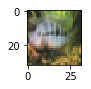

In [6]:
# Visualizing CIFAR 10
fig, axes1 = plt.subplots(figsize=(1, 1))
axes1.imshow(train_reshaped[0], interpolation='none')